In [1]:
from sisyphus2.backend.models.basic import Basic, BasicSigmoid, BasicScan
from sisyphus2.backend.models.lstm import LSTM
from sisyphus2.backend import task
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
rdm = task.RDM(N_in = 2, N_out = 2, dt = 10, tau = 100, T = 2000, N_batch = 128)
gen = rdm.batch_generator()

In [3]:
params = rdm.__dict__

In [4]:
params['name'] = 'model'
params['N_rec'] = 50

In [5]:
model = Basic(params)

In [ ]:
model.build()
model.train(gen, {'save_weights_path': '../weights/refactor_weights.npz'})

In [11]:
x,y,m = gen.next()

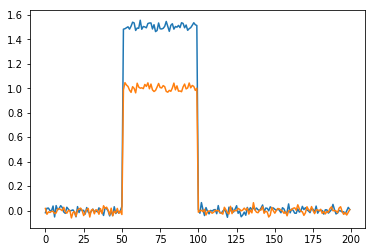

In [12]:
plt.plot(x[0,:,:])

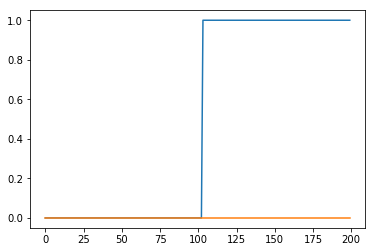

In [13]:
plt.plot(y[0,:,:])

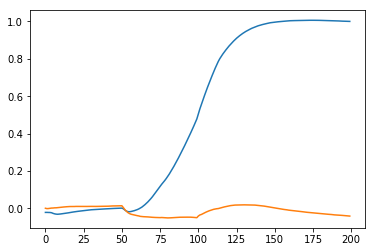

In [14]:
plt.plot(model.test(x)[0][0,:,:])

In [31]:
model.destruct()